In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataFrame = pd.read_csv("hmelq.csv")
dataFrame.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [3]:
dataFrame.shape

(3576, 13)

In [4]:
dataFrame.isna().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [5]:
# Drop NaN
dataFrame = dataFrame.dropna()
dataFrame.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [6]:
dataFrame.shape

(2018, 13)

In [7]:
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [8]:
dataFrame["bad"].unique() # binary classification

array([0, 1], dtype=int64)

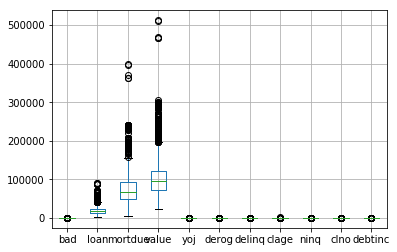

In [9]:
dataFrame.boxplot()

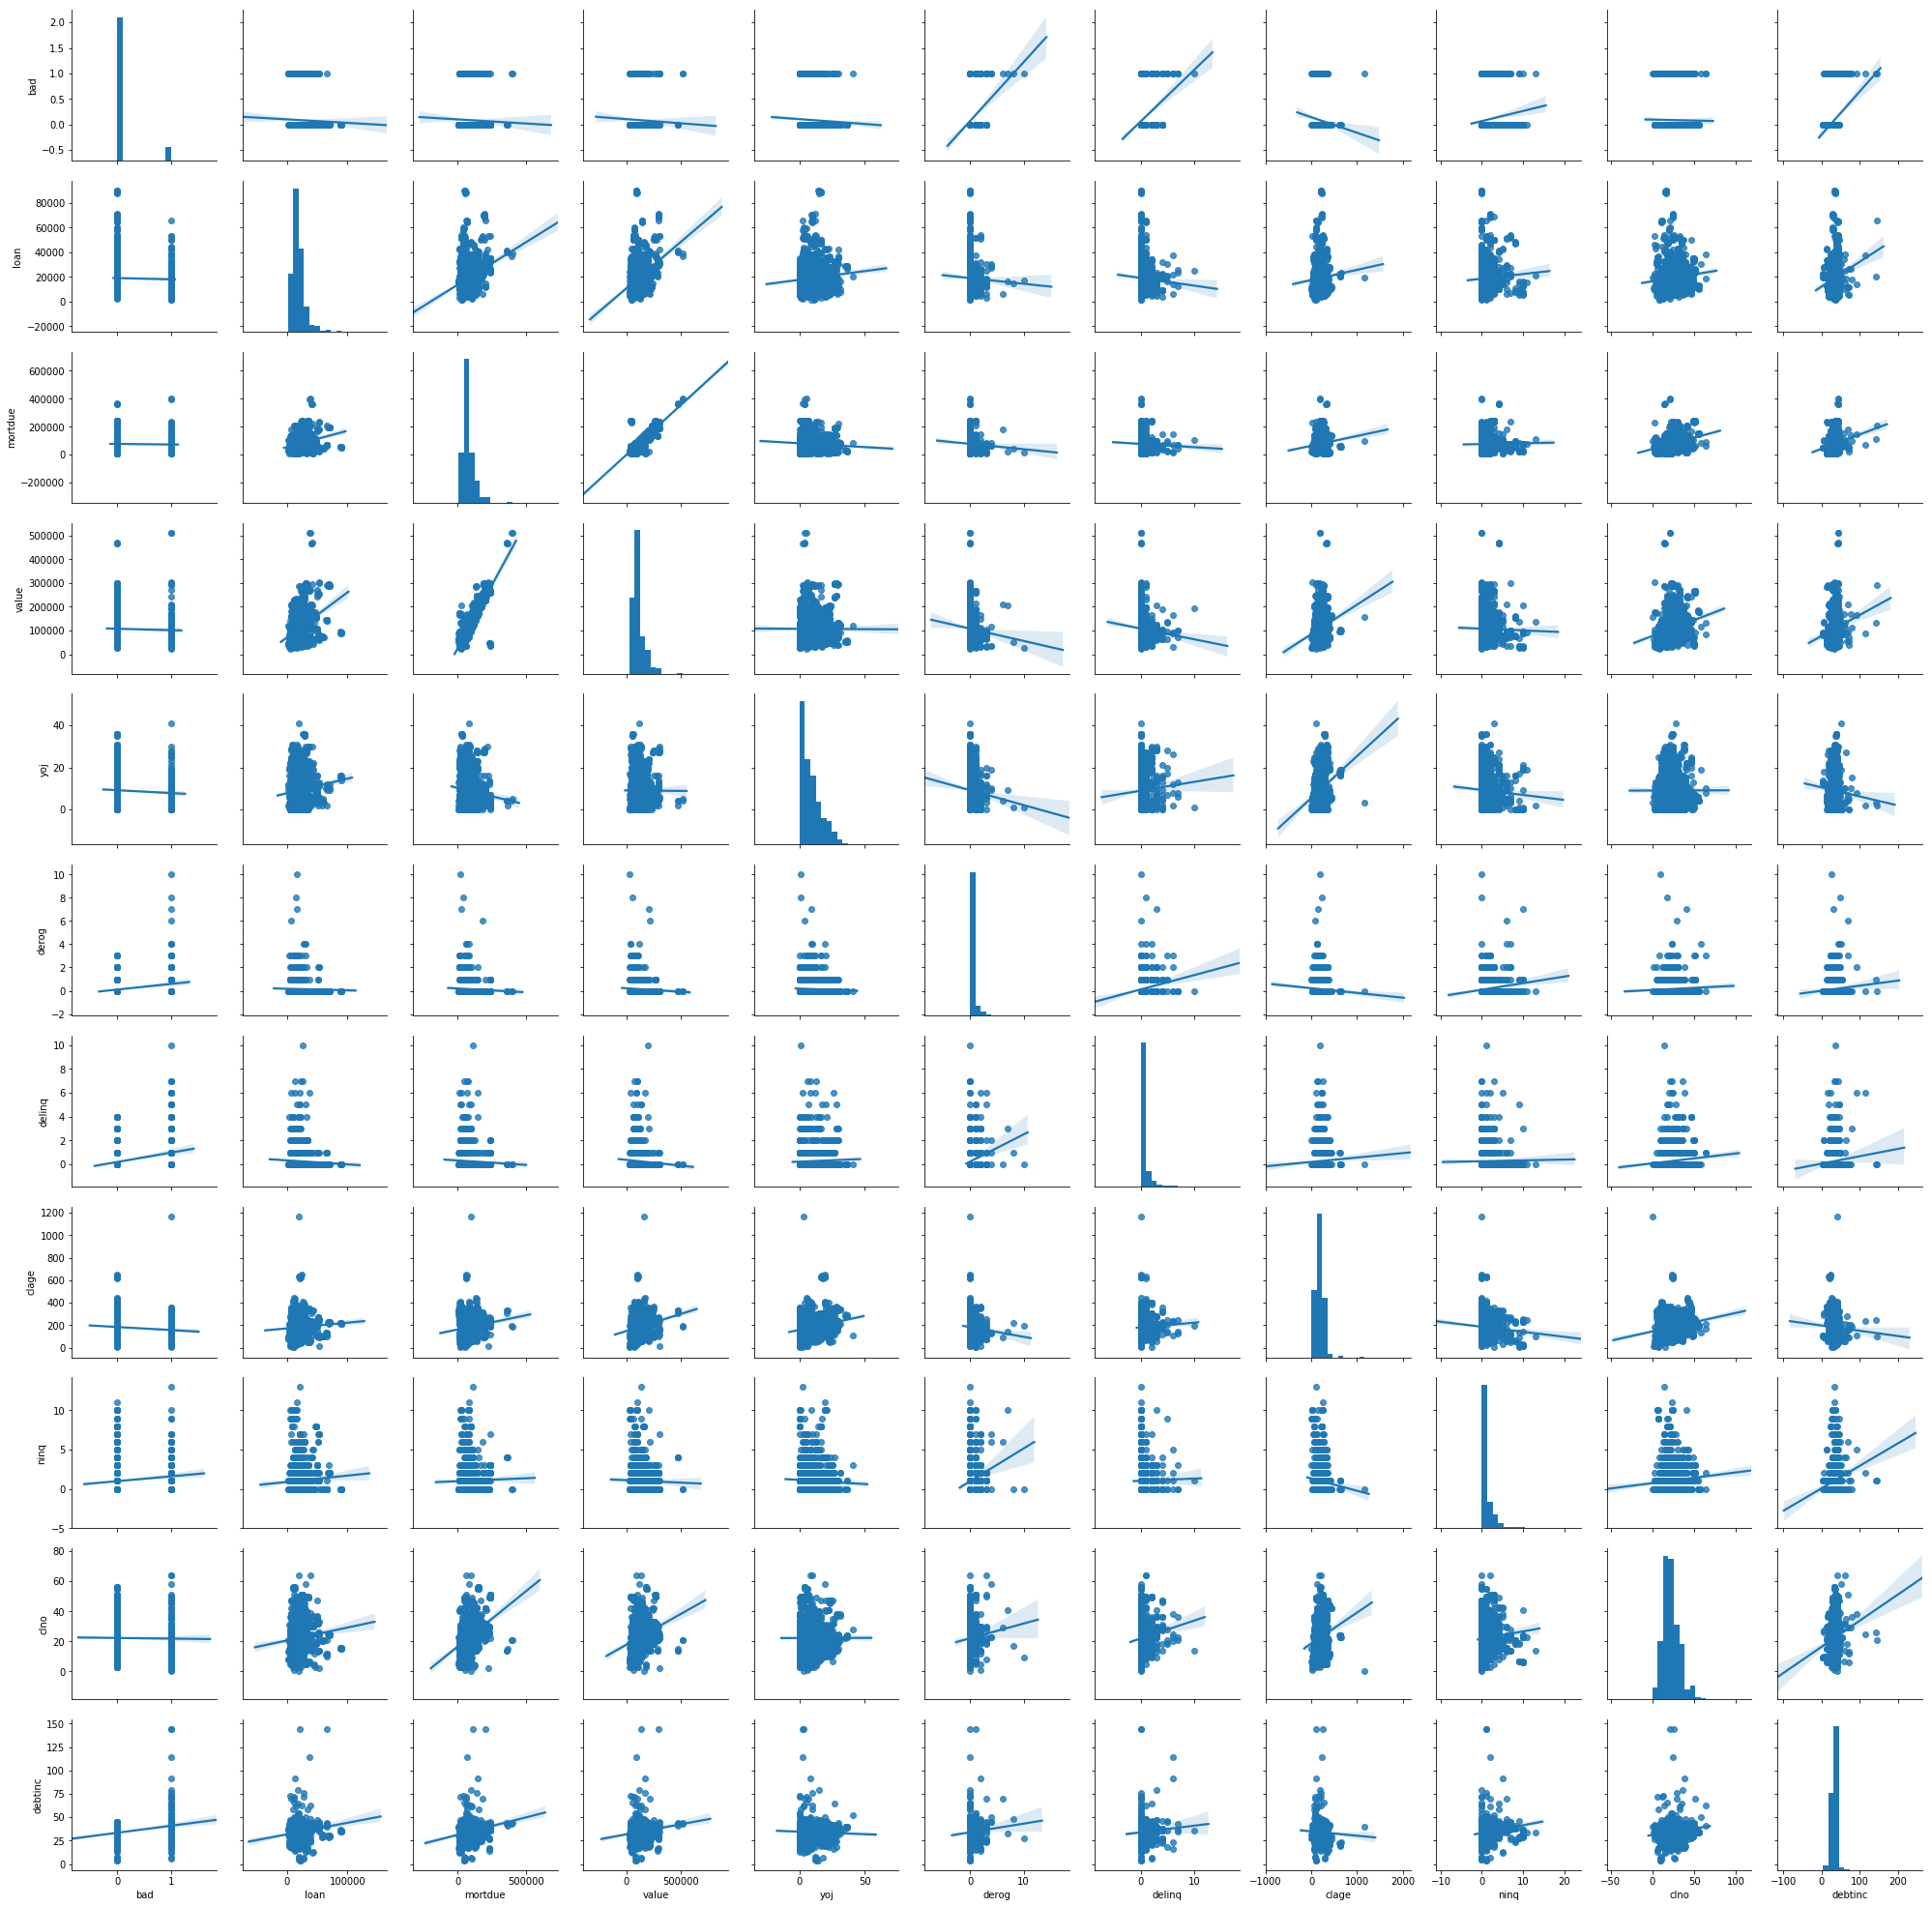

In [10]:
sns.pairplot(dataFrame, kind="reg")

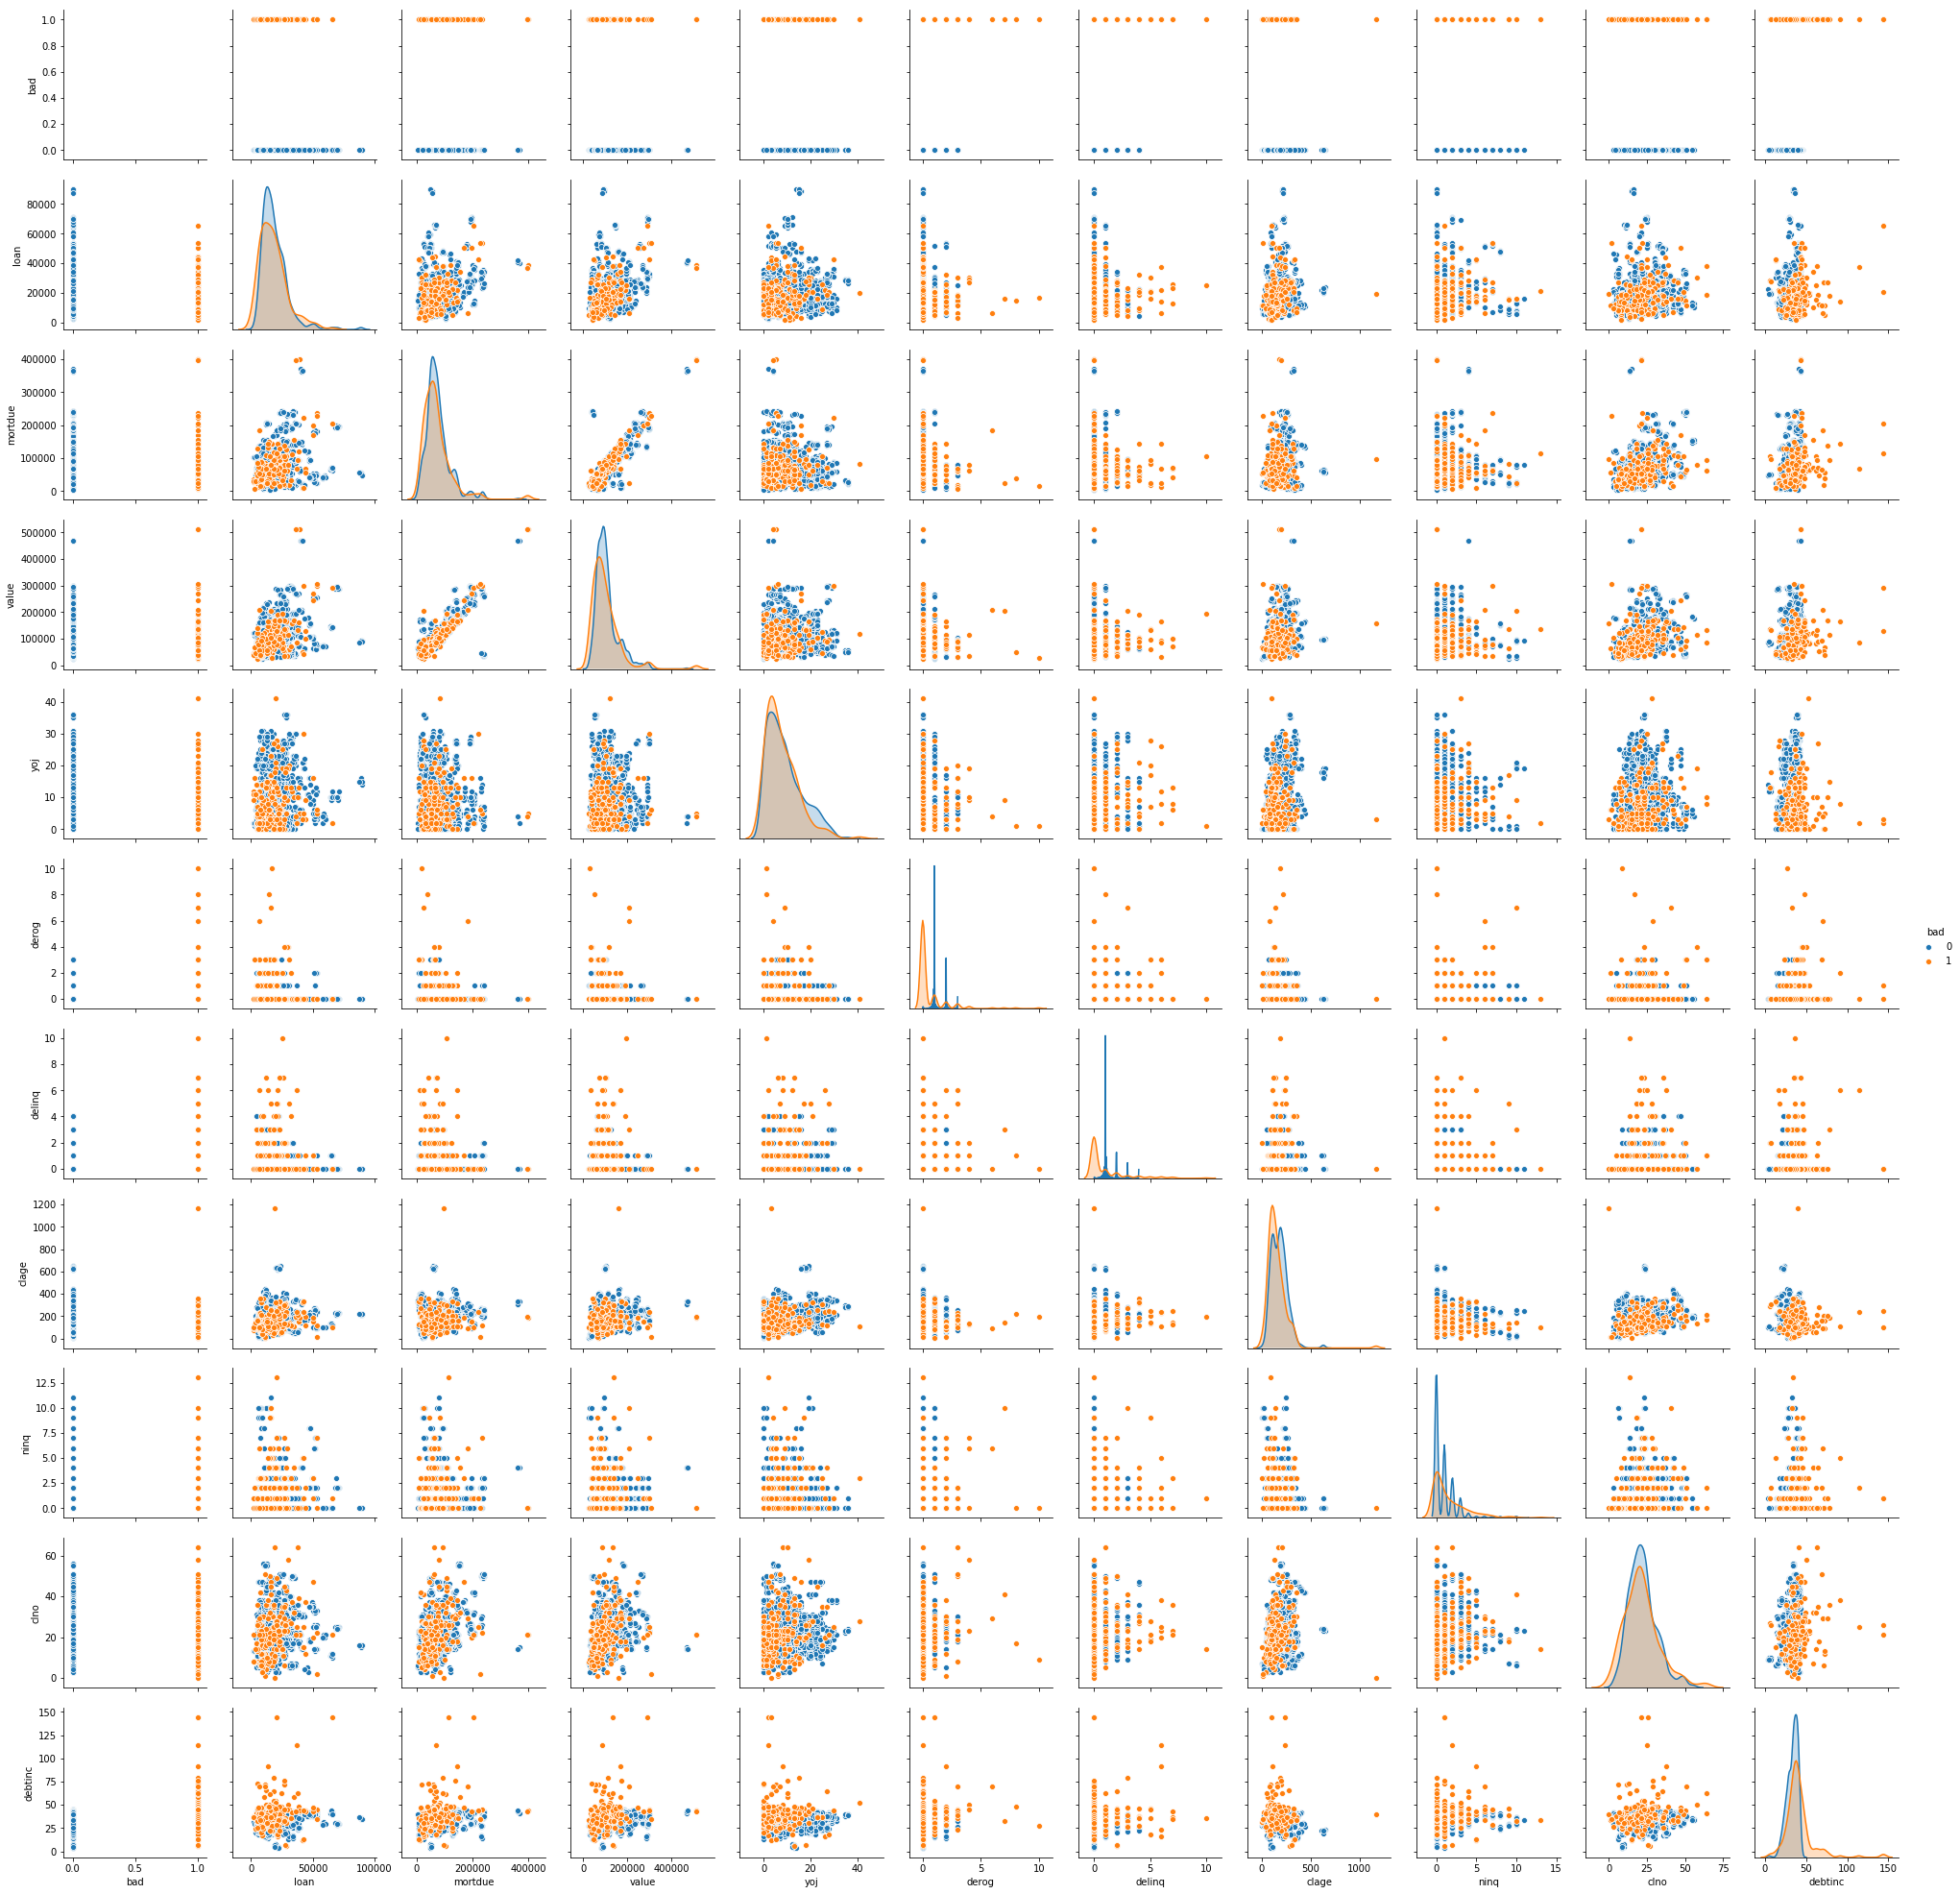

In [11]:
sns.pairplot(dataFrame, hue = "bad")

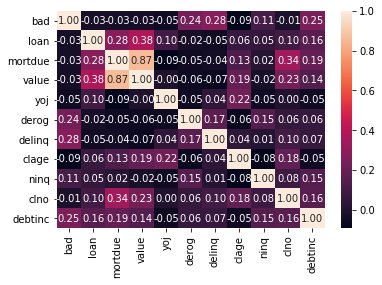

In [12]:
sns.heatmap(dataFrame.drop(columns=["reason", "job"]).corr(), annot=True, fmt=".2f")

In [13]:
# Logistic Regression without categorized string features and scaling the features
xTrain, xTest, yTrain, yTest = train_test_split(dataFrame.drop(columns = ["bad", "reason", "job"]), dataFrame["bad"], 
                                                test_size = 0.25, random_state = 42)
model = LogisticRegressionCV(cv=10, random_state = 42, multi_class='ovr').fit(xTrain, yTrain)
yPred = model.predict(xTest)
print("Training Score is ", model.score(xTrain, yTrain))
print("Test Score is ", accuracy_score(yTest, yPred))
print("Confusion Matrix is \n", confusion_matrix(yTest, yPred))

Training Score is  0.9081295439524124
Test Score is  0.9227722772277228
Confusion Matrix is 
 [[466   0]
 [ 39   0]]


Training Score is  0.923331130204891
Test Score is  0.9306930693069307


Text(33.0, 0.5, 'Actuals')

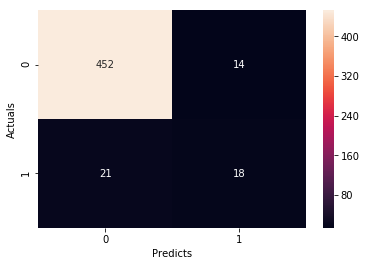

In [14]:
# Logistic Regression just without categorized string features
xTrain, xTest, yTrain, yTest = train_test_split(dataFrame.drop(columns = ["bad", "reason", "job"]), dataFrame["bad"], 
                                                test_size = 0.25, random_state = 42)
xTrain = (xTrain - np.mean(xTrain)) / (np.max(xTrain) - np.min(xTrain))
xTest = (xTest - np.mean(xTest)) / (np.max(xTest) - np.min(xTest))
model = LogisticRegressionCV(cv=10, random_state = 42, multi_class='ovr').fit(xTrain, yTrain)
yPred = model.predict(xTest)
print("Training Score is ", model.score(xTrain, yTrain))
print("Test Score is ", accuracy_score(yTest, yPred))
ax = sns.heatmap(confusion_matrix(yTest, yPred), annot = True, fmt = "d")
ax.set_xlabel("Predicts")
ax.set_ylabel("Actuals")

Optimal number of features : 10
Best features : Index(['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq',
       'clno', 'debtinc'],
      dtype='object')
Training Score is  0.923331130204891
Test Score is  0.9306930693069307


Text(33.0, 0.5, 'Actuals')

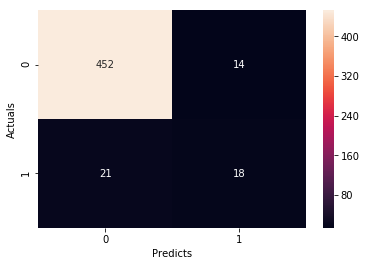

In [15]:
# Logistic Regression just without categorized string features
xTrain, xTest, yTrain, yTest = train_test_split(dataFrame.drop(columns = ["bad", "reason", "job"]), dataFrame["bad"], 
                                                test_size = 0.25, random_state = 42)
xTrain = (xTrain - np.mean(xTrain)) / (np.max(xTrain) - np.min(xTrain))
xTest = (xTest - np.mean(xTest)) / (np.max(xTest) - np.min(xTest))

clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=10,scoring='accuracy') 
rfecv = rfecv.fit(xTrain, yTrain)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', xTrain.columns[rfecv.support_])

model = LogisticRegressionCV(cv=10, random_state = 42, multi_class='ovr').fit(xTrain[xTrain.columns[rfecv.support_]], yTrain)
yPred = model.predict(xTest[xTrain.columns[rfecv.support_]])
print("Training Score is ", model.score(xTrain[xTrain.columns[rfecv.support_]], yTrain))
print("Test Score is ", accuracy_score(yTest, yPred))
ax = sns.heatmap(confusion_matrix(yTest, yPred), annot = True, fmt = "d")
ax.set_xlabel("Predicts")
ax.set_ylabel("Actuals")

Scaling and feature selection are useful for improving test score.

In [16]:
dummyFeatures = pd.get_dummies(dataFrame[["job", "reason"]])
dataFrameWithDummies = pd.concat([dataFrame.drop(columns = ["job", "reason"]), dummyFeatures], axis = 1)
dataFrameWithDummies.head()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self,reason_DebtCon,reason_HomeImp
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,0,0,0,0,1,0
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,0,0,0,0,1,0
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,0,0,0,0,1,0
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0,0,1
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,0,0,0,0,1,0


In [17]:
dataFrameWithDummies.shape

(2018, 19)

Optimal number of features : 13
Best features : Index(['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq',
       'clno', 'debtinc', 'job_Office', 'job_Other', 'reason_DebtCon'],
      dtype='object')
Training Score is  0.9239920687376074
Test Score is  0.9306930693069307


Text(33.0, 0.5, 'Actuals')

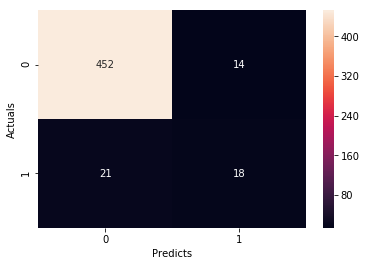

In [18]:
# Logistic Regression with categorized string features and scaling the features
xTrain, xTest, yTrain, yTest = train_test_split(dataFrameWithDummies.drop(columns = ["bad"]), dataFrameWithDummies["bad"], 
                                                test_size = 0.25, random_state = 42)
xTrain = (xTrain - np.mean(xTrain)) / (np.max(xTrain) - np.min(xTrain))
xTest = (xTest - np.mean(xTest)) / (np.max(xTest) - np.min(xTest))

clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=10,scoring='accuracy') 
rfecv = rfecv.fit(xTrain, yTrain)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', xTrain.columns[rfecv.support_])

model = LogisticRegressionCV(cv=10, random_state = 42, multi_class='ovr').fit(xTrain[xTrain.columns[rfecv.support_]], yTrain)
yPred = model.predict(xTest[xTrain.columns[rfecv.support_]])
print("Training Score is ", model.score(xTrain[xTrain.columns[rfecv.support_]], yTrain))
print("Test Score is ", accuracy_score(yTest, yPred))
ax = sns.heatmap(confusion_matrix(yTest, yPred), annot = True, fmt = "d")
ax.set_xlabel("Predicts")
ax.set_ylabel("Actuals")